<a href="https://colab.research.google.com/github/ctarrington/try-colab/blob/master/beta_multiplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import factorial
import numpy as np
from scipy.stats import beta

from matplotlib.pyplot import plot, fill_between
from IPython import display


In [2]:
def comb(n,k):
  return factorial(n)/(factorial(k) * factorial(n-k))

In [3]:
def normalize(probabilities):
  total = sum(probabilities)
  return [p / total for p in probabilities]

In [4]:
def binomial_p(n,k):
  def distribution(single_trial_p):
    return comb(n, k) * single_trial_p**k * (1-single_trial_p)**(n-k)

  return distribution

In [5]:
num_points = 20*1000
trial_ps = [p/num_points for p in range(0,num_points+1, 1)]

# Discrete hack first (DO NOT REALLY USE THIS TECHNIQUE)

In [6]:
doomed  = binomial_p(200, 10)  # 200 try, 10 succeed, 190 fail
lucky = binomial_p(100, 90)  # ninety percent success rate

doomed_probs = normalize([doomed(p) for p in trial_ps])
lucky_probs = normalize([lucky(p) for p in trial_ps])

# multiply each discrete probability to approximate the product of two distributions
product_probs = normalize([doomed_p*lucky_p for doomed_p, lucky_p in zip(doomed_probs, lucky_probs)])

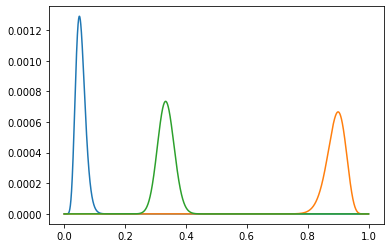

In [7]:
plot(trial_ps, doomed_probs)
plot(trial_ps, lucky_probs) 
plot(trial_ps, product_probs)

##What does it mean to multiply two binomial distributions?

The shape of each curve is determined by $p^k (1-p)^{(n-k)}$

So if we multiply two distributions    
$p^{k1}(1-p)^{n1-k1} p^{k2}(1-p)^{n2-k2}$
We get   

$p^{k1+k2}(1-p)^{(n1+n2)-(k1+k2)}$

Which simplifies to a non-normalized form of Binomial(n1+n2, k1+k2)


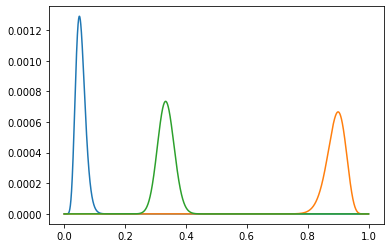

In [8]:
added_parameters = binomial_p(300, 100)
added_parameters_probs = normalize([added_parameters(p) for p in trial_ps])

plot(trial_ps, doomed_probs)
plot(trial_ps, lucky_probs) 
plot(trial_ps, added_parameters_probs)

## SciPy's Beta distribution for the win
If we want accurate results in a timely manner and with less code

In [9]:
doomed_rv = beta(10, 190)
lucky_rv = beta(90, 10)
product_rv = beta(100, 200)

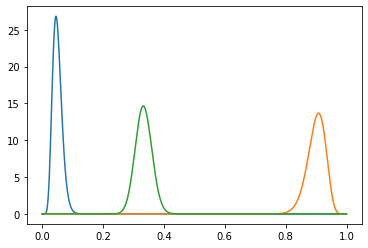

In [10]:
plot(trial_ps, doomed_rv.pdf(trial_ps))
plot(trial_ps, lucky_rv.pdf(trial_ps))
plot(trial_ps, product_rv.pdf(trial_ps))


##Note: The shapes are very similar. The scales are completely different - as the curves get spiky the discrete approximation requires more and more points to work well. The discrete approximation is interesting but unless you have an hour to let it grind through a zillion points I wouldn't use the numbers it produces...

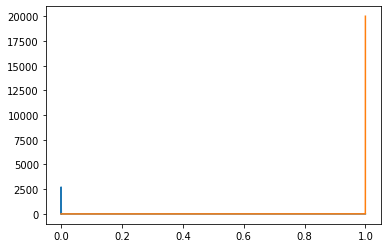

In [11]:
### Sample from Bayesian Statistics the Fun Way
doomed_rv = beta(2, 7440)
lucky_rv = beta(20000, 1)

plot(trial_ps, doomed_rv.pdf(trial_ps))
plot(trial_ps, lucky_rv.pdf(trial_ps))



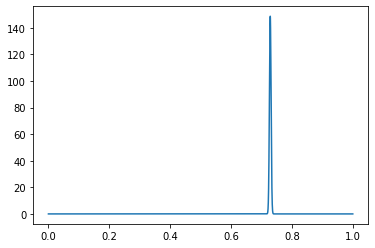

In [12]:
product_rv = beta(20002, 7441)
plot(trial_ps, product_rv.pdf(trial_ps))

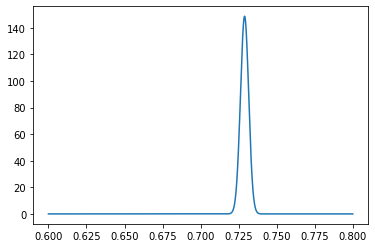

In [13]:
some_points = trial_ps[round(0.6*num_points):round(0.8*num_points)]
plot(some_points, product_rv.pdf(some_points))